# Social Network Analysis

Creating *graphs*. 
 - nodes and edges

Directed graphs / undirected graphs

A -> B: directed graph
 - A and B are the nodes
 - the edge is the arrow
 
A - B: undirected graph
 - the edge is the dash
 
Lots of possibilities for "social networks" or literary graphs
 - characters are the nodes, edges are whether they appear in the same sentence, paragraph, etc. 
 - place names are the nodes, edges are whether they appear in the same sentence, paragraph, chapter, etc. 
 - place names and characters are nodes


In [103]:
import networkx
from itertools import combinations 
import spacy
from collections import Counter

In [54]:
nlp = spacy.load('en_core_web_lg')

In [2]:
moonstone = open('../Readings/content/texts/moonstone.md').read()

In [56]:
nlp.max_length = 1100000

In [57]:
moonstoneDoc = nlp(moonstone)

In [16]:
characters = {"Rachel": ["Rachel Verinder", "Rachel", "Miss Verinder"],
     "Franklin": ["Franklin Blake", "Mr. Blake", "Blake", "Franklin"],
     "Betteredge": ["Gabriel", "Gabriel Betteredge", "Betteredge"],
     "Lucy": ["Limping Lucy", "Lucy"],
     "Clack": ["Clack", "Miss Clack", "Drusilla"],
     "Cuff": ["Cuff", "Sergeant"],
     "Candy": ["Mr. Candy"],
     "Ezra": ["Jennings", "Ezra"],
     "Godfrey": ["Godfrey", "Ablewhite"],
     "Penelope": ["Penelope", "my daughter"]
    }
def normalizeName(name): 
    for char in characters: 
        if name in characters[char]: 
            return char

In [31]:
allCharacters = []
for charList in characters.values():
    for charName in charList:
        allCharacters.append(charName)

In [32]:
allCharacters

['Rachel Verinder',
 'Rachel',
 'Miss Verinder',
 'Franklin Blake',
 'Mr. Blake',
 'Blake',
 'Franklin',
 'Gabriel',
 'Gabriel Betteredge',
 'Betteredge',
 'Limping Lucy',
 'Lucy',
 'Clack',
 'Miss Clack',
 'Drusilla',
 'Cuff',
 'Sergeant',
 'Mr. Candy',
 'Jennings',
 'Ezra',
 'Godfrey',
 'Ablewhite',
 'Penelope',
 'my daughter']

In [9]:
normalizeName("Jennings")

'Ezra'

In [10]:
normalizeName("Gabriel")

'Betteredge'

In [18]:
chars = list(characters.keys())

In [23]:
charPairs = {pair: 0 for pair in list(combinations(chars, 2))}

In [24]:
charPairs

{('Rachel', 'Franklin'): 0,
 ('Rachel', 'Betteredge'): 0,
 ('Rachel', 'Lucy'): 0,
 ('Rachel', 'Clack'): 0,
 ('Rachel', 'Cuff'): 0,
 ('Rachel', 'Candy'): 0,
 ('Rachel', 'Ezra'): 0,
 ('Rachel', 'Godfrey'): 0,
 ('Rachel', 'Penelope'): 0,
 ('Franklin', 'Betteredge'): 0,
 ('Franklin', 'Lucy'): 0,
 ('Franklin', 'Clack'): 0,
 ('Franklin', 'Cuff'): 0,
 ('Franklin', 'Candy'): 0,
 ('Franklin', 'Ezra'): 0,
 ('Franklin', 'Godfrey'): 0,
 ('Franklin', 'Penelope'): 0,
 ('Betteredge', 'Lucy'): 0,
 ('Betteredge', 'Clack'): 0,
 ('Betteredge', 'Cuff'): 0,
 ('Betteredge', 'Candy'): 0,
 ('Betteredge', 'Ezra'): 0,
 ('Betteredge', 'Godfrey'): 0,
 ('Betteredge', 'Penelope'): 0,
 ('Lucy', 'Clack'): 0,
 ('Lucy', 'Cuff'): 0,
 ('Lucy', 'Candy'): 0,
 ('Lucy', 'Ezra'): 0,
 ('Lucy', 'Godfrey'): 0,
 ('Lucy', 'Penelope'): 0,
 ('Clack', 'Cuff'): 0,
 ('Clack', 'Candy'): 0,
 ('Clack', 'Ezra'): 0,
 ('Clack', 'Godfrey'): 0,
 ('Clack', 'Penelope'): 0,
 ('Cuff', 'Candy'): 0,
 ('Cuff', 'Ezra'): 0,
 ('Cuff', 'Godfrey'): 0,
 ('

In [25]:
moonstoneParas = moonstone.split('\n\n')

In [26]:
len(moonstoneParas)

3679

In [34]:
for para in moonstoneParas: 
    for charPair in charPairs:
        if charPair[0] in para and charPair[1] in para: 
            charPairs[charPair] += 1

In [35]:
charPairs

{('Rachel', 'Franklin'): 83,
 ('Rachel', 'Betteredge'): 26,
 ('Rachel', 'Lucy'): 0,
 ('Rachel', 'Clack'): 11,
 ('Rachel', 'Cuff'): 20,
 ('Rachel', 'Candy'): 4,
 ('Rachel', 'Ezra'): 4,
 ('Rachel', 'Godfrey'): 45,
 ('Rachel', 'Penelope'): 35,
 ('Franklin', 'Betteredge'): 54,
 ('Franklin', 'Lucy'): 3,
 ('Franklin', 'Clack'): 10,
 ('Franklin', 'Cuff'): 24,
 ('Franklin', 'Candy'): 10,
 ('Franklin', 'Ezra'): 2,
 ('Franklin', 'Godfrey'): 26,
 ('Franklin', 'Penelope'): 52,
 ('Betteredge', 'Lucy'): 2,
 ('Betteredge', 'Clack'): 0,
 ('Betteredge', 'Cuff'): 21,
 ('Betteredge', 'Candy'): 16,
 ('Betteredge', 'Ezra'): 9,
 ('Betteredge', 'Godfrey'): 6,
 ('Betteredge', 'Penelope'): 10,
 ('Lucy', 'Clack'): 0,
 ('Lucy', 'Cuff'): 4,
 ('Lucy', 'Candy'): 0,
 ('Lucy', 'Ezra'): 0,
 ('Lucy', 'Godfrey'): 0,
 ('Lucy', 'Penelope'): 2,
 ('Clack', 'Cuff'): 0,
 ('Clack', 'Candy'): 0,
 ('Clack', 'Ezra'): 0,
 ('Clack', 'Godfrey'): 13,
 ('Clack', 'Penelope'): 1,
 ('Cuff', 'Candy'): 0,
 ('Cuff', 'Ezra'): 0,
 ('Cuff', 'G

In [44]:
graph = networkx.Graph()

In [45]:
graph.add_nodes_from(chars)

In [46]:
graph.nodes

NodeView(('Rachel', 'Franklin', 'Betteredge', 'Lucy', 'Clack', 'Cuff', 'Candy', 'Ezra', 'Godfrey', 'Penelope'))

In [47]:
# graph.add_edge('Rachel', 'Franklin', 83)

In [48]:
for pair, weight in charPairs.items(): 
    if weight > 0: 
        graph.add_edge(pair[0], pair[1], weight=weight)

In [49]:
graph.edges

EdgeView([('Rachel', 'Franklin'), ('Rachel', 'Betteredge'), ('Rachel', 'Clack'), ('Rachel', 'Cuff'), ('Rachel', 'Candy'), ('Rachel', 'Ezra'), ('Rachel', 'Godfrey'), ('Rachel', 'Penelope'), ('Franklin', 'Betteredge'), ('Franklin', 'Lucy'), ('Franklin', 'Clack'), ('Franklin', 'Cuff'), ('Franklin', 'Candy'), ('Franklin', 'Ezra'), ('Franklin', 'Godfrey'), ('Franklin', 'Penelope'), ('Betteredge', 'Lucy'), ('Betteredge', 'Cuff'), ('Betteredge', 'Candy'), ('Betteredge', 'Ezra'), ('Betteredge', 'Godfrey'), ('Betteredge', 'Penelope'), ('Lucy', 'Cuff'), ('Lucy', 'Penelope'), ('Clack', 'Godfrey'), ('Clack', 'Penelope'), ('Cuff', 'Godfrey'), ('Cuff', 'Penelope'), ('Candy', 'Ezra'), ('Candy', 'Godfrey'), ('Candy', 'Penelope'), ('Ezra', 'Godfrey'), ('Ezra', 'Penelope'), ('Godfrey', 'Penelope')])

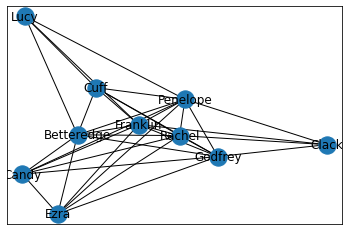

In [52]:
networkx.draw_networkx(graph, figsize=(10,10))

In [106]:
moonstoneLocs = [w for w in moonstoneDoc.ents if w.label_ == 'GPE']

In [135]:
allLocs = list(Counter([w.text for w in moonstoneLocs if w.text.istitle()]).most_common(9))

In [136]:
allLocs = [pair[0] for pair in allLocs]

In [137]:
allLocs

['London',
 'England',
 'Yorkshire',
 'India',
 'Brighton',
 'Hampstead',
 'Amsterdam',
 'Lambeth',
 'Rotterdam']

In [138]:
locPairs = {pair: 0 for pair in list(combinations(allLocs, 2))}

In [139]:
len(locPairs)

36

In [140]:
for para in moonstoneParas:
    for pair in locPairs:
        if pair[0] in para and pair[1] in para: 
            locPairs[pair] += 1

In [141]:
graph = networkx.Graph()
graph.add_nodes_from(allLocs)

In [142]:
graph.nodes

NodeView(('London', 'England', 'Yorkshire', 'India', 'Brighton', 'Hampstead', 'Amsterdam', 'Lambeth', 'Rotterdam'))

In [143]:
for pair, weight in locPairs.items():
    if weight > 0:
        graph.add_edge(pair[0], pair[1], weight=weight)

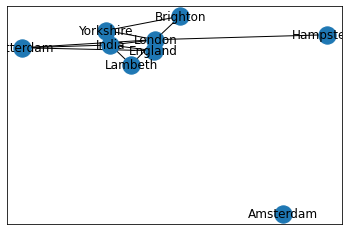

In [144]:
networkx.draw_networkx(graph)